# TASK 1: IRIS FLOWER CLASSIFICATION

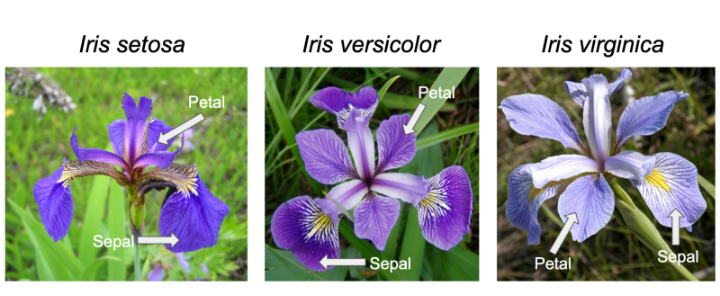

## Task Description:

- Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.
- Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine Learning. 

## About the Dataset:

- The IRIS Dataset [link](https://www.kaggle.com/datasets/saurabh00007/iriscsv) is a multivariate dataset which contains the data to quantify the morphologic variation of Iris flowers of three related species. 
- The dataset consists of 50 samples from each of three species of Iris, namely Iris Setosa, Iris virginica, and Iris versicolor. 
- Four features were measured from each sample which are the length and the width of the sepals and petals, in centimeters.
- The dataset is a CSV file which contains a set of 150 records under 6 attributes - Id, Petal Length, Petal Width, Sepal Length, Sepal width and Species.

## Project Outline:

1. Problem Statement
2. Importing Libraries and Loading Data
3. Data Information and Understanding the Data
4. Exploratory data analysis(EDA)
5. Data Visualisation
6. Feature Engineering
7. Splitting the Data into training and testing sets.
8. Model Training and Model Evaluation
9. Model Testing: The Inference Pipeline
10. Generating the output file with predicted results 
11. Conclusion

## Problem Statement:

- The Iris dataset comprises three distinct iris species—Setosa, Versicolour, and Virginica—each characterized by attributes including Petal Length, Petal Width, Sepal Length, and Sepal Width.
- The primary goal of this multiclassification project is to develop a robust and accurate machine learning model capable of predicting the species type of an Iris flower based on its morphological features.

## Objective:

- This data science project focuses on classifying the Iris flower species using machine learning models. 
- It includes importing necessary libraries, data inspection, data visualization, model building, generating predictions, and evaluating model performance. 
- The project aims to compare the performance of different models, including Logistic Regression, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Decision Tree in classifying Iris flower species.
- The purpose of this notebook is to employ the required machine learning techniques to improve our comprehension of the morphological variations present within the Iris species.
- This information can be valuable for various stakeholders, including botanists, researchers, and horticulturists, as it enhances our ability to categorize and interpret the diversity present in Iris flowers.

## Importing Necessary Libraries and Loading Data

In [1]:
# Data Manipulation
import numpy as np #NumPy library, a fundamental package for numerical computations 
import pandas as pd #Pandas library,used for data manipulation and analysis, particularly with data structures like dataframes.

# Data Viz
import matplotlib.pyplot as plt  #Matplotlib library,visualization library
import seaborn as sns  #A data visualization library built on top of Matplotlib

# ML Models
from sklearn.model_selection import train_test_split #Imports the train_test_split function from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from tabulate import tabulate
#Import evaluation metrics for assessing model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score,  recall_score, f1_score 

# Import Warnings to manage or ignore warning messages in the code
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load the data from csv file to Pandas DataFrame

df = pd.read_csv(r'C:\Users\BINDU MADHURI\Desktop\OIBSIP\IRIS FLOWER CLASSIFICATION\Iris.csv')

## Data Information and Understanding the Data:

In [3]:
def data_info(df,head=5):
    print(55*"-" + "Data Size".center(20) + 55*"-")
    print(f'Data Size: {df.size}')
    print("\n" + 55*"-" + "Data Shape".center(20) + 55*"-")
    print(f'\nThe dataframe consists of {df.shape[0]} rows and {df.shape[1]} columns')
    print("\n" + 50*"-" + "The first 5 rows of data".center(30) + 50*"-")
    print(df.head())
    print("\n" + 50 * "-" + "The last 5 rows of data".center(30) + 50 * "-")
    print(df.tail())
    print("\n" + 40*"-" + "Listing all the columns in the dataframe".center(50) + 40*"-")
    print(df.columns)
    print("\n" + 40*"-" + "Total number of unique values in each column".center(50) + 40*"-")
    print(df.nunique())
    print("\n" + 45*"-" + "Information about the dataframe".center(40) + 45*"-")
    print(df.info())
    print("\n" + 35 * "-" + "Checking Statistical Summary for numeric columns".center(60) + 35 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    print("\n" + 40 * "-" + "Checking Statistical Summary for all columns".center(55) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99], include='all').T)
    
data_info(df)

-------------------------------------------------------     Data Size      -------------------------------------------------------
Data Size: 900

-------------------------------------------------------     Data Shape     -------------------------------------------------------

The dataframe consists of 150 rows and 6 columns

--------------------------------------------------   The first 5 rows of data   --------------------------------------------------
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--------------------------------------------------   The last 5 rows of data 

**Understanding the data:**
- There are 150 observations and 5 variables. 
- The dataset comprises four numerical attributes: sepal length, sepal width, petal length, and petal width.
- The target variable, species, is categorical and encompasses three classes: Iris-setosa, Iris-versicolor, and Iris-virginica, each with 50 instances.

## Exploratory data analysis(EDA)

#### Check the class counts

In [4]:
class_counts = df['Species'].value_counts()
print("Class counts of", class_counts)
#print()

Class counts of Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [5]:
df['Species']=df['Species'].str.replace('Iris-','')
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

**Inference:** We can see that all the species contain an equal amount of rows, so we should not delete any entries.

#### Data Cleaning: Drop the unnecessary column

In [6]:
# Drop the 'Id' column as it is not required for analysis
df = df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Data Preprocessing: Check for missing values

In [7]:
missing_values = df.isnull().sum()
percentage_missing = (missing_values/len(df))*100
check_null = pd.DataFrame({'missing_values': missing_values,'percentage_missing': percentage_missing})
print(check_null)

if missing_values.any():
    print("Dataset has null values.")
    print("Columns with null values:")
    print(missing_values[missing_values > 0])
else:
    print("\nDataset has no null values.")

               missing_values  percentage_missing
SepalLengthCm               0                 0.0
SepalWidthCm                0                 0.0
PetalLengthCm               0                 0.0
PetalWidthCm                0                 0.0
Species                     0                 0.0

Dataset has no null values.


#### Data Preprocessing: Check for duplicates

In [8]:
duplicates = df.duplicated().sum()
duplicates_df = df[df.duplicated()]

if not duplicates_df.empty:
    print("Duplicates found in the dataset:", duplicates)
    print(duplicates_df)
else:
    print("No duplicates found in the dataset.")

Duplicates found in the dataset: 3
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm    Species
34             4.9           3.1            1.5           0.1     setosa
37             4.9           3.1            1.5           0.1     setosa
142            5.8           2.7            5.1           1.9  virginica


**Inference:** From the above, we can clearly see that the Dataset has no duplicate values.

#### Data Preprocessing: Detecting the outliers

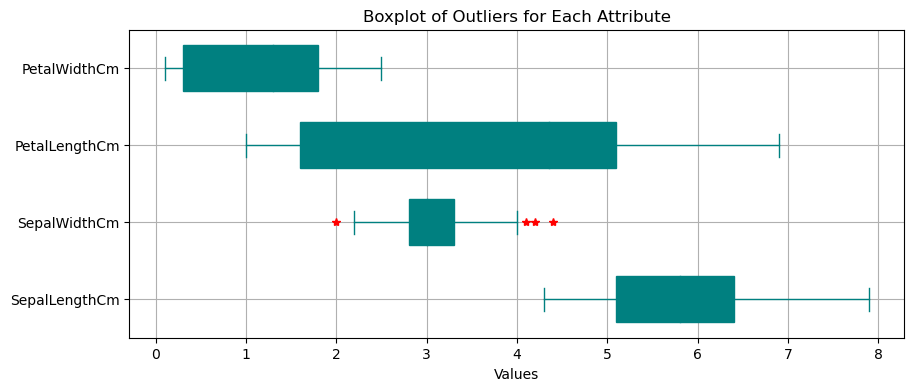

In [9]:
# Create a boxplot for each attribute excluding the target variable
input_attributes = df.columns[:-1].tolist()
plt.figure(figsize=(10, 4))
df[input_attributes].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6, color='teal')
plt.title('Boxplot of Outliers for Each Attribute')
plt.xlabel('Values')
plt.show()

**Insights:** From the above boxplots, we can clearly see that the outliers are detected in the sepal width. So, we have to remove outliers with the replacement of outliers with the median.

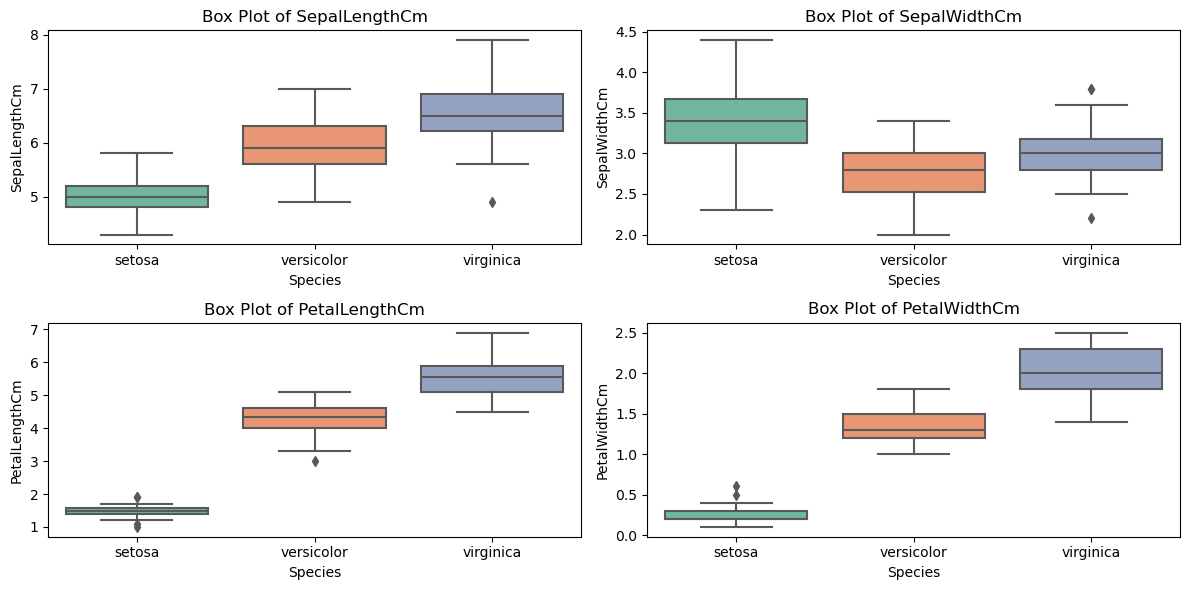

In [10]:
# Create a boxplot for all the attributes with target variable 
plt.figure(figsize=(12, 6))

attributes = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, attribute in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=attribute, data=df, palette='Set2')

    plt.title(f'Box Plot of {attribute}')
    plt.xlabel('Species')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

**Insights:** From the above boxplots, we can see that the boxplots provide a summary of the distribution of each numeric feature for each species. From the boxplots, we can see that the outliers are detected in the sepal length of virginica, sepal width of virginica, petal length of setosa and versicolor and petal width of setosa, but we'll not remove for all attributes, as they are very much close and the dataset also have few entries. Notably, Species Setosa has the smallest features and less distributed with some outliers. Species Versicolor has the average features. Species Virginica has the highest features.

#### Data Preprocessing: Treating Outliers for sepal width

In [11]:
# Replace outliers with median value for each attribute excluding the target variable
input_attributes = df.columns[:-1].tolist()
def replace_outliers_with_median(attribute):
    median = attribute.median()
    lower_limit = attribute.quantile(0.25) - 1.5 * (attribute.quantile(0.75) - attribute.quantile(0.25))
    upper_limit = attribute.quantile(0.75) + 1.5 * (attribute.quantile(0.75) - attribute.quantile(0.25))
    
    # Replace values outside the upper and lower limits with the median
    attribute = attribute.apply(lambda x: median if x < lower_limit or x > upper_limit else x)
    return attribute

# Apply the function to each attribute in the DataFrame
for attribute in input_attributes:
    df[attribute] = replace_outliers_with_median(df[attribute])

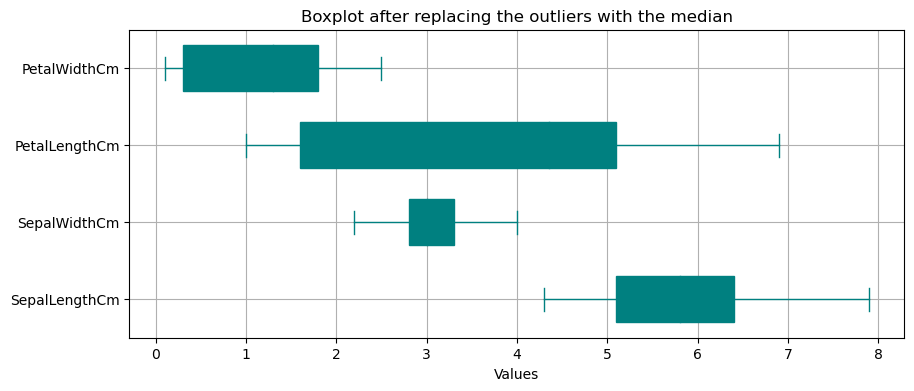

In [12]:
# Box plots to verify if outliers were removed
input_attributes = df.columns[:-1].tolist()
plt.figure(figsize=(10, 4))
df[input_attributes].boxplot(sym='r*', vert=False, patch_artist=True, widths=0.6, color='teal')
plt.title('Boxplot after replacing the outliers with the median')
plt.xlabel('Values')
plt.show()

#### Check Numeric and Categorical columns in the dataframe 

In [13]:
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Object columns in the dataframe: ['Species']


#### Check unique values in each column of the dataframe

In [14]:
# Displaying the total number of unique values in each column
for i in df:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in SepalLengthCm column are: 35
No. of unique values in SepalWidthCm column are: 19
No. of unique values in PetalLengthCm column are: 43
No. of unique values in PetalWidthCm column are: 22
No. of unique values in Species column are: 3


In [15]:
# Displaying the unique values in each column
unique_val=[]
print("Unique values in each column are - ")
print()
for col in df.columns:
    print(f'{col}: {df[col].unique()}')
    unique_val.append(col)
    print("-"*110)

Unique values in each column are - 

SepalLengthCm: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
--------------------------------------------------------------------------------------------------------------
SepalWidthCm: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  3.8 3.3 2.3 2.8 2.4 2.7 2.2 2.5
 2.6]
--------------------------------------------------------------------------------------------------------------
PetalLengthCm: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
--------------------------------------------------------------------------------------------------------------
PetalWidthCm: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
-----------------------------------------------------------------------------------

## Data Visualization

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or try loading this page with nbviewer.org

#### 1. Distribution of Species

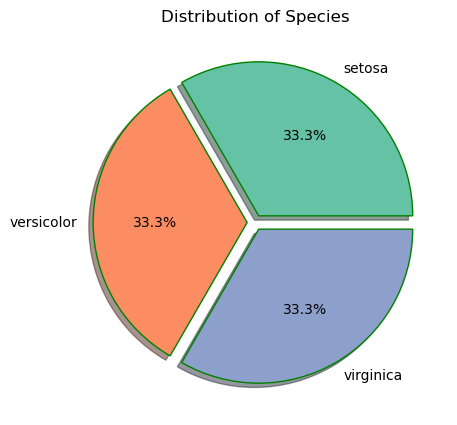

In [16]:
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(df['Species'].value_counts(),
        labels= df['Species'].unique(),
        autopct='%1.1f%%', shadow=True,
        explode=(.05, .05, .05), wedgeprops=wp,
        colors = ['#66c2a5', '#fc8d62', '#8da0cb'], textprops=dict(color="black"))

ax.set_title("Distribution of Species")

plt.show()

**Insights:** The above Pie chart displays the distribution of species in the dataset. From the above pie chart, we can clearly see that the species setosa, versicolor and virginia are equally distributes with 33.3% from the total percentage of the given species data.

#### 2. Relationship between variables

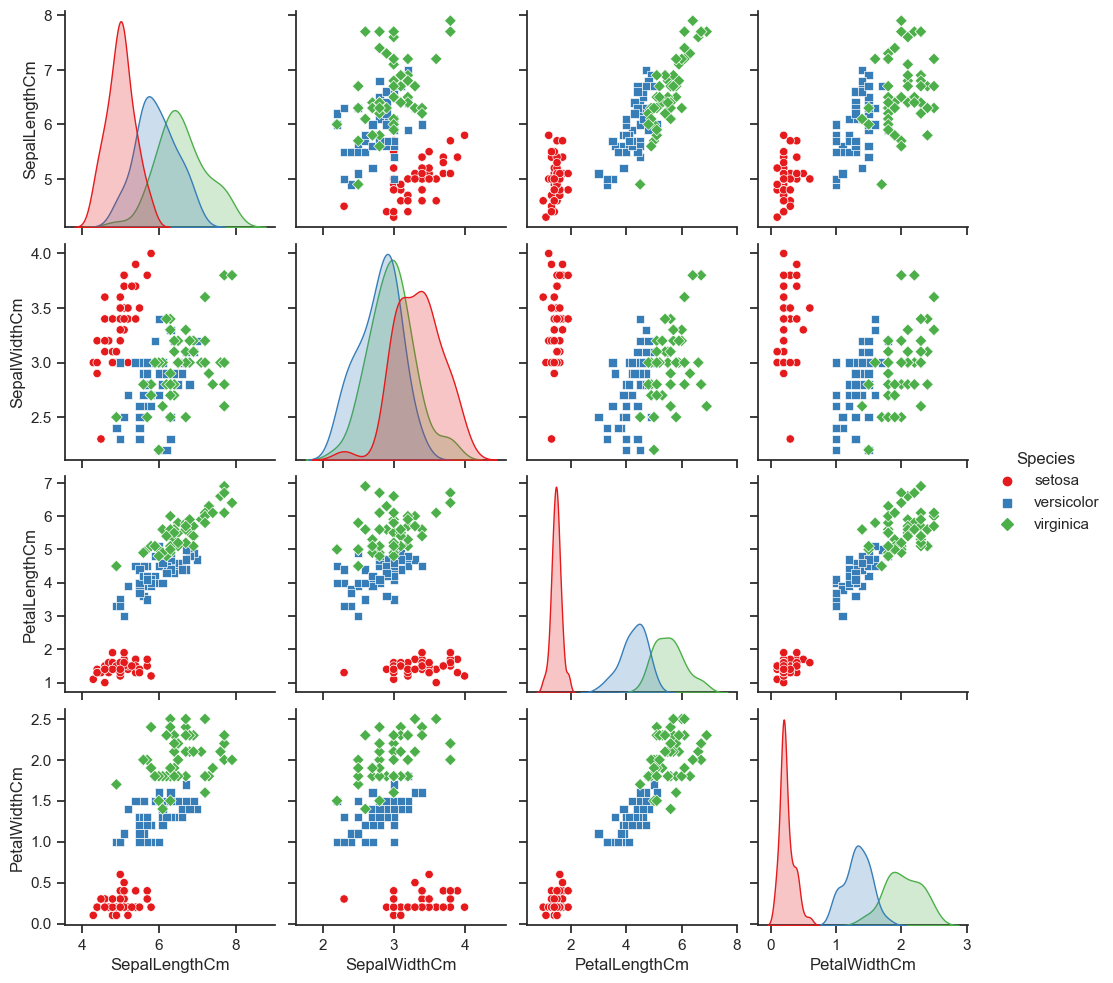

In [17]:
# Pairplot to visualize relationships between features
sns.set(style="ticks")
custom_palette = sns.color_palette("Set1")[:3]
sns.pairplot(df, hue='Species', markers=['o', 's', 'D'], palette=custom_palette)
plt.show()

**Insights:** The above pairplot shows pairwise relationships between numeric features, with different colors for each species. It helps us visualize how features relate to each other and how they separate the species. Notably, setosa can be easily separated(linearly separable),virginica and versicolor have some overlap(almost linearly separable). Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. 

#### 3. Distribution of data for the various columns using Histogram

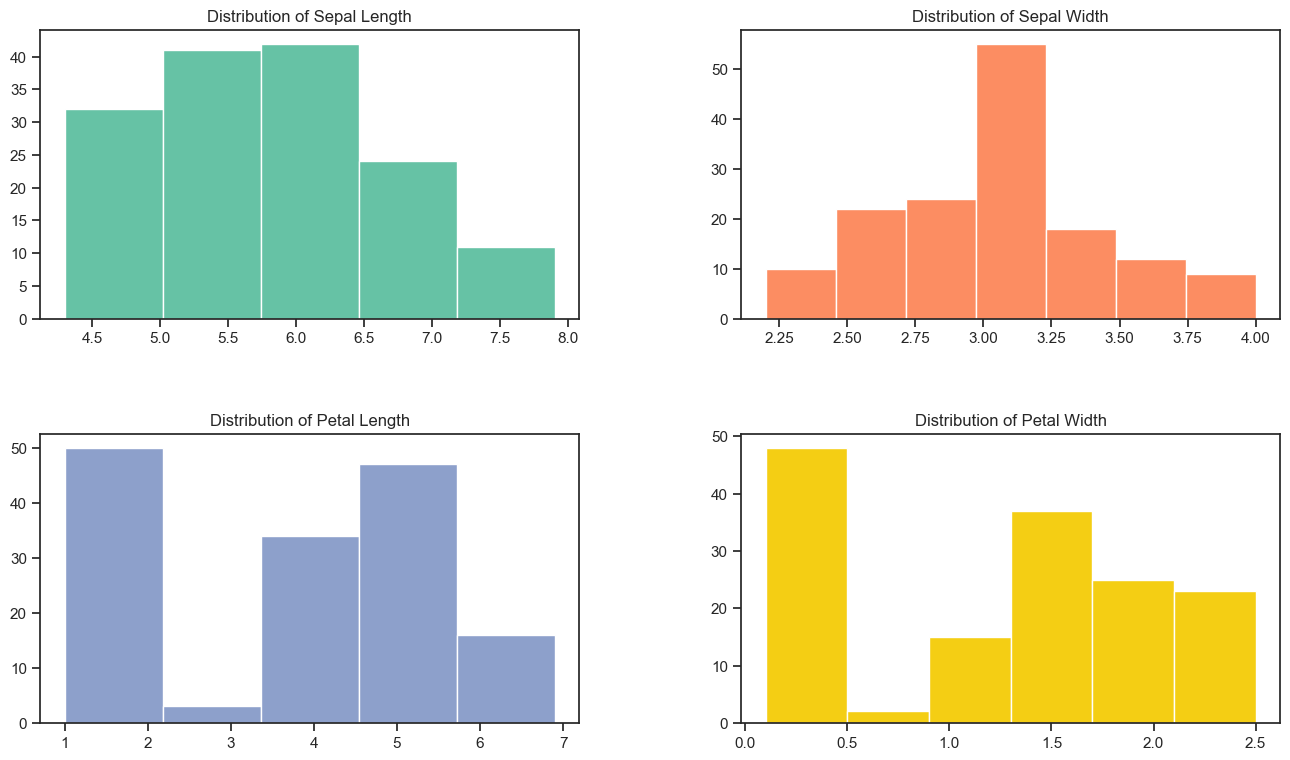

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=5, color="#66c2a5");
axes[0,1].set_title("Distribution of Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=7,color="#fc8d62");
axes[1,0].set_title("Distribution of Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=5,color="#8da0cb");
axes[1,1].set_title("Distribution of Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6,color="#F4CE14");

# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

**Insights:** From the above histagram plots, we can see that -

- The Highest frequency of sepal length is between 5.7 and 6.5 which is around 42.
- The Highest frequency of sepal width is between 3.0 to 3.25 which is around 55.
- The Highest frequency of petal length is between 1 to 2.1 which is around 50.
- The Highest frequency of petal width is between 0.2 to 0.5 which is around 48.

#### 4. Histogram to visualize relationships between variables

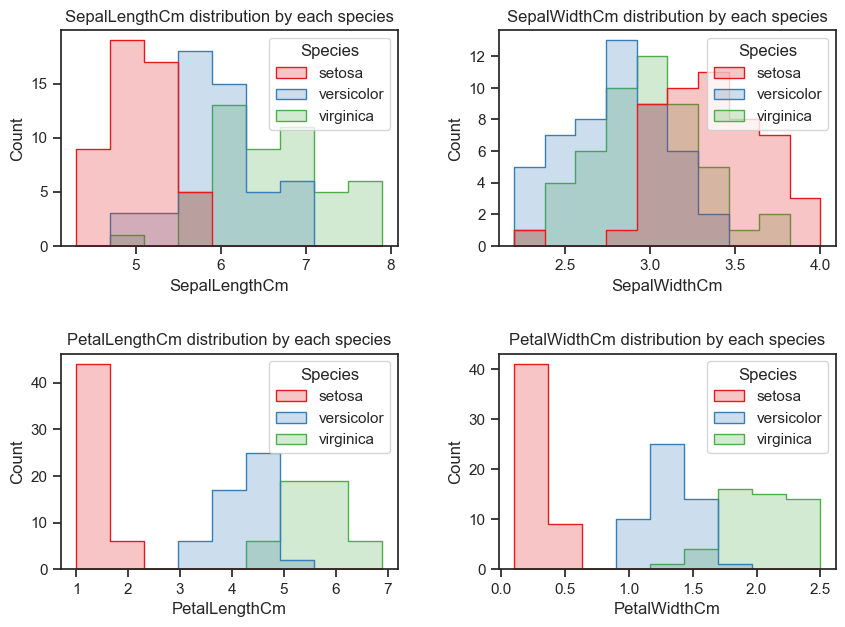

In [19]:
# Plot histogram
plt.figure(figsize=(10, 7))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=column, hue='Species', element="step", common_norm=False, palette="Set1")
    plt.title(f'{column} distribution by each species')
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

**Insights:** The above visualisations clearly shows that the three species of Iris flowers have distinct characteristics in terms of sepal length, sepal width, petal length, and petal width. Setosa typically has shorter sepal and petal lengths but wider sepals, while Virginica has longer sepals and petals compared to the other two species. Versicolor falls in between Setosa and Virginica in terms of these measurements.

#### 5. Histogram with a density plot to visualize relationships between variables

Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

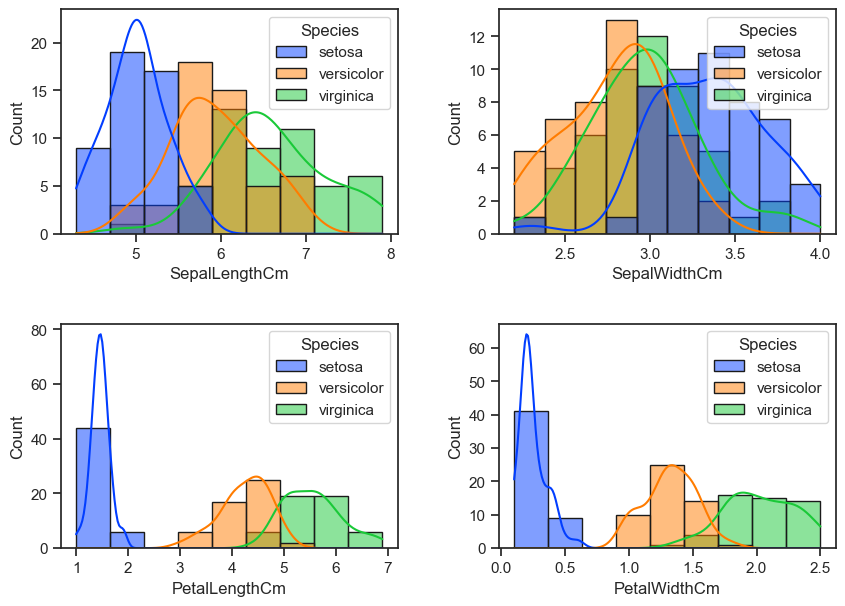

In [20]:
# Plot histogram with a density plot
fig, axes = plt.subplots(2, 2, figsize=(10,7))
sns.histplot(ax = axes[0,0],data=df,x ='SepalLengthCm',hue='Species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[0,1],data=df,x ='SepalWidthCm',hue='Species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[1,0],data=df,x ='PetalLengthCm',hue='Species',kde=True,palette="bright",edgecolor='k')
sns.histplot(ax = axes[1,1],data=df,x ='PetalWidthCm',hue='Species',kde=True,palette="bright",edgecolor='k')
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)

**Insights:** From the above visualization we can see that – 
- In the case of Sepal Length, there is a huge amount of overlapping.
- In the case of Sepal Width also, there is a huge amount of overlapping.
- In the case of Petal Length, there is a very little amount of overlapping.
- In the case of Petal Width also, there is a very little amount of overlapping.

So we can use Petal Length and Petal Width as the classification feature.

#### 6. Swarm plots for each attribute

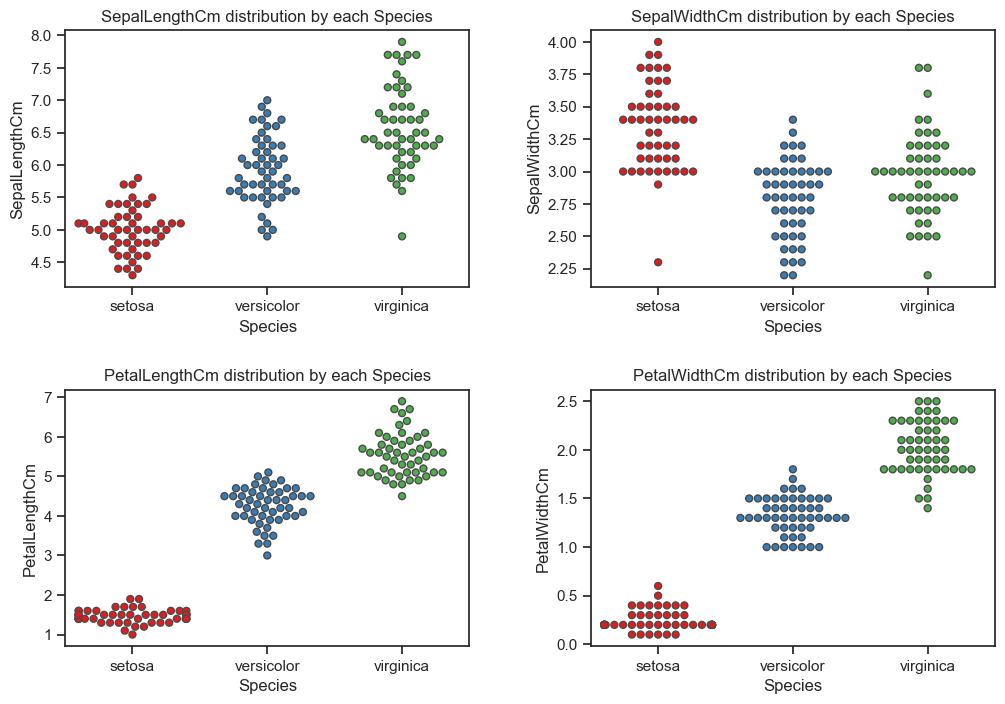

In [21]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='Species', y=column, data=df, linewidth=1, palette="Set1")
    plt.title(f'{column} distribution by each Species')
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

**Insights:** The plots above reveal clear distinctions among the iris species. Setosa has the smallest petals and a unique sepal width. Versicolor falls in the middle and Virginica has the largest petals.

#### 7. Violin plot to visualize distribution and density by species

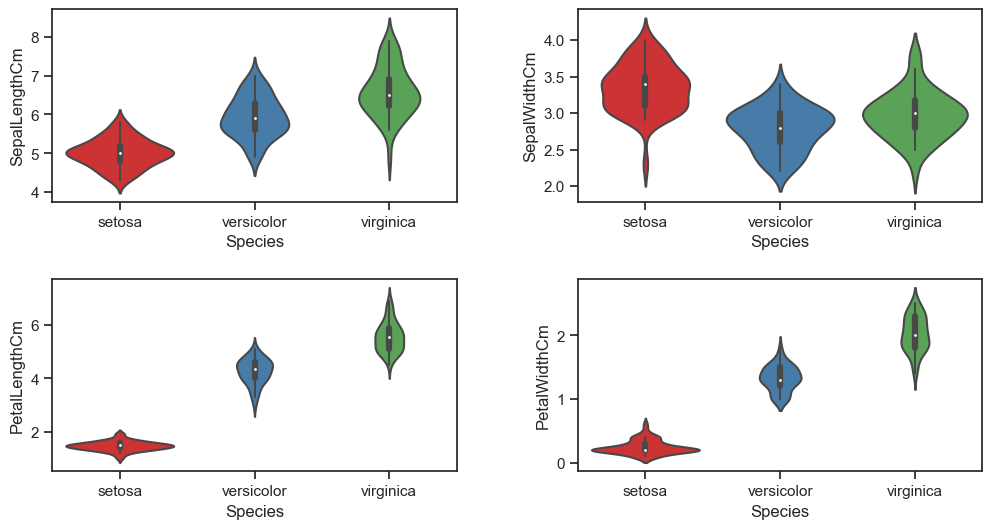

In [22]:
# Violin plot to visualize distribution and density by species
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", y="SepalLengthCm", data=df, palette="Set1")
plt.subplot(2, 2, 2)
sns.violinplot(x="Species", y="SepalWidthCm", data=df, palette="Set1")
plt.subplot(2, 2, 3)
sns.violinplot(x="Species", y="PetalLengthCm", data=df, palette="Set1")
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="PetalWidthCm", data=df, palette="Set1")
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

**Insights:** From the above violin plots, we can clearly see that petal length and petal width are most useful feature to separate the various flower types. We can see clear separation between the Iris-setosa species and the other two species, making it a good feature for classification. For setosa, length and width of petal is significantly less as compared to other two violin plots. The petal width and length of virginica is maximum as compared to other two species. The sepal width of setosa covers a wide range but the length is small as compared to other two species.

#### 8. Generic plot for Sepal length vs width and Petal length vs width

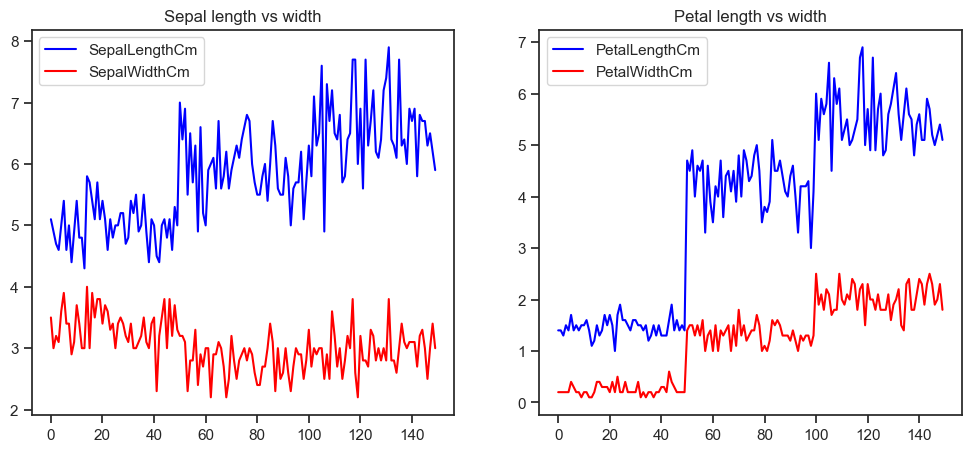

In [23]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(df['SepalLengthCm'],color='blue')
ax[0].plot(df['SepalWidthCm'],color='red')
ax[0].set_title('Sepal length vs width')
ax[0].legend(['SepalLengthCm','SepalWidthCm'])
ax[1].plot(df['PetalLengthCm'],color='blue')
ax[1].plot(df['PetalWidthCm'],color='red')
ax[1].set_title('Petal length vs width')
ax[1].legend(['PetalLengthCm','PetalWidthCm'])
plt.show()

**Insights**: From the above plot, we can see that the valleys are observed in petal length and petal width as there is gap of observation in between. The petal length observes a wide range in values from 1 to 7. In sepal width and sepal length, majority of the values are close to the median.

#### Inference from all the above visualizations:
- Species Setosa has smaller sepal lengths but larger sepal widths.
- Versicolor Species lies in the middle of the other two species in terms of sepal length and width
- Species Virginica has larger sepal lengths but smaller sepal widths.
- Species Setosa has smaller petal lengths and widths.
- Versicolor Species lies in the middle of the other two species in terms of petal length and width
- Species Virginica has the largest of petal lengths and widths.

#### 9. Visualise the correlation using a heatmap

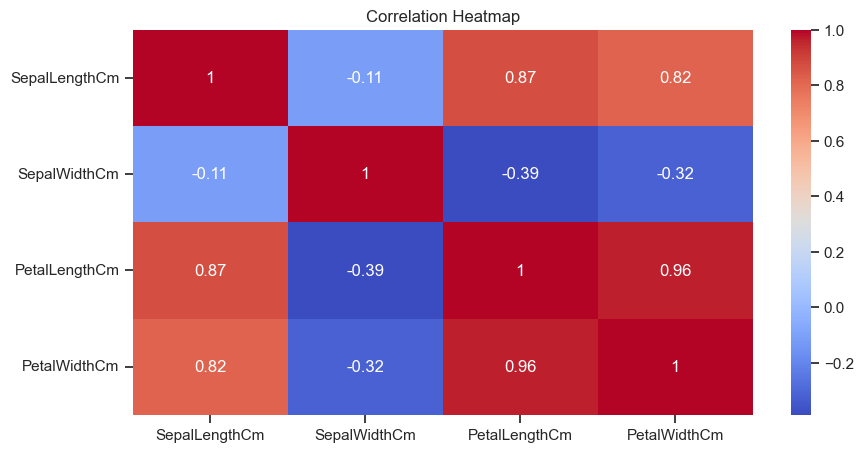

In [24]:
plt.figure(figsize=(10, 5))
correlation_matrix = df.corr(numeric_only = True)
ax = sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm");
ax.set_title("Correlation Heatmap")
plt.show()

**Insights:** The correlation heatmap shows the pairwise correlation coefficients between numeric features. It helps us understand how features are related to each other. In this case, we can see strong positive correlations between petal length and petal width, as well as between sepal length and petal length. Also, Petal width and sepal length have good correlation.

## Feature Engineering

Assigning numerical values to the classes: "setosa":0,"versicolor":1,"virginica":2

In [25]:
#Encoding on target variable
df["Species"]=df["Species"].replace({"setosa":0,"versicolor":1,"virginica":2})

In [26]:
# Define X and y
X = df.drop(['Species'], axis=1)
y = df['Species']

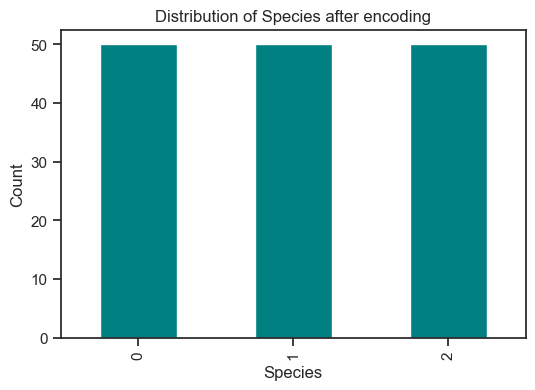

In [27]:
#plot the encoded data
Species_encoded = y.value_counts()
plt.figure(figsize=(6, 4))
Species_encoded.plot(kind='bar', color='teal')
plt.title('Distribution of Species after encoding')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

We have a balanced dataset! This proves that species are well balanced. Hence this will be useful for valuable insights while predicting the model.

## Splitting the Data into training and testing sets

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Print shapes of X_train, y_train, X_test, y_test
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


## Model Training and Model Evaluation

In [29]:
#Create a function a evaluate performance metrics
def Evaluate_Performance(model, Xtrain, Xtest, ytrain, ytest) : 
    model.fit(Xtrain,ytrain)
    overall_score = cross_val_score(model, Xtrain,ytrain, cv=10)
    model_score = np.average(overall_score)
    ypredicted = model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(model.score(Xtrain, ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(ytest, ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(ytest, ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(ytest, ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(ytest, ypredicted , average=avg) * 100,2)}")

### 1. Logistic Regression Model

In [30]:
#Building Logistic Regression model and evaluating the model's performance metrics
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train.ravel())
Logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression: ")
Evaluate_Performance(logistic_model, X_train, X_test, y_train, y_test)

Logistic Regression: 

 • Training Accuracy Score :  97.32
 • Cross Validation Score : 96.36
 • Testing Accuracy Score :94.74
 • Precision Score is : 95.61
 • Recall Score is : 94.74
 • F1-Score Score is : 94.71


Text(47.25, 0.5, 'Actual outputs')

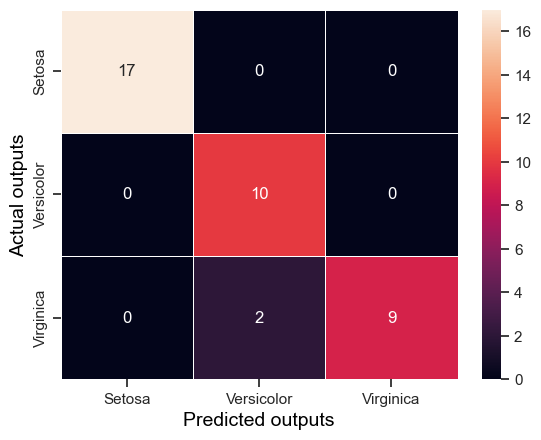

In [31]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, Logistic_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

### 2. K-Nearest Neighbors Model

In [32]:
KNN = KNeighborsClassifier()
parameters = {"n_neighbors" : range(1,50)}
grid_kn = GridSearchCV(estimator = KNN , param_grid = parameters , scoring = "accuracy" , cv = 5 , verbose = 1 , n_jobs = -1)

grid_kn.fit(X_train , y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'n_neighbors': 13}

In [34]:
K = 13
KNN_model = KNeighborsClassifier(K)
KNN_model.fit(X_train , y_train.ravel())
KNN_pred = KNN_model.predict(X_test)
print("K-Nearest Neighbors: ")
Evaluate_Performance(KNN_model, X_train, X_test, y_train, y_test)

K-Nearest Neighbors: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 96.36
 • Testing Accuracy Score :97.37
 • Precision Score is : 97.61
 • Recall Score is : 97.37
 • F1-Score Score is : 97.37


Text(47.25, 0.5, 'Actual outputs')

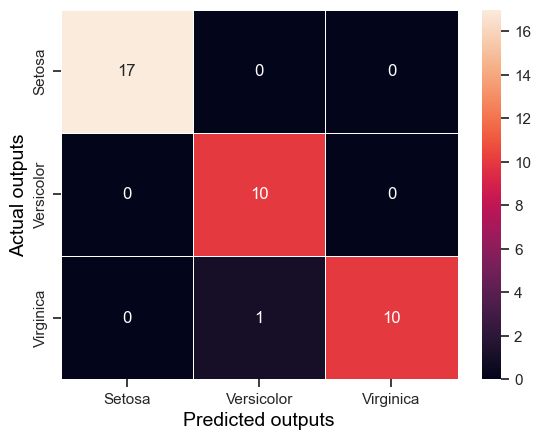

In [35]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, KNN_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

### 3. Gaussian Naive Bayes Model

In [36]:
GNB_model = GaussianNB()
GNB_model.fit(X_train , y_train.ravel())
GNB_pred = GNB_model.predict(X_test)
print("Gaussian Naive Bayes: ")
Evaluate_Performance(GNB_model, X_train, X_test, y_train, y_test)

Gaussian Naive Bayes: 

 • Training Accuracy Score :  97.32
 • Cross Validation Score : 97.27
 • Testing Accuracy Score :92.11
 • Precision Score is : 93.93
 • Recall Score is : 92.11
 • F1-Score Score is : 92.0


Text(47.25, 0.5, 'Actual outputs')

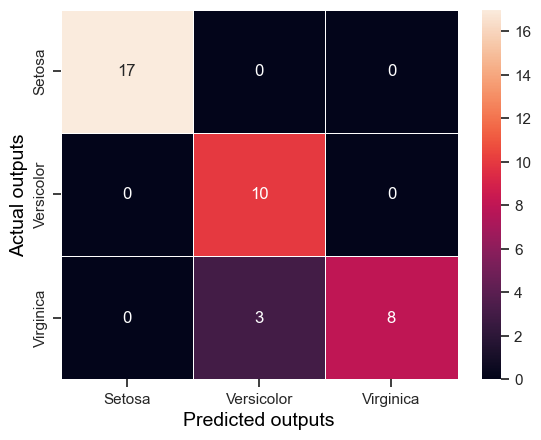

In [37]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, GNB_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

### 4. Support Vector Machine Model

In [38]:
SVM_model = SVC()
SVM_model.fit(X_train , y_train)
SVM_pred = SVM_model.predict(X_test)
print("Support Vector Machine: ")
Evaluate_Performance(SVM_model, X_train, X_test, y_train, y_test)

Support Vector Machine: 

 • Training Accuracy Score :  96.43
 • Cross Validation Score : 94.62
 • Testing Accuracy Score :94.74
 • Precision Score is : 95.61
 • Recall Score is : 94.74
 • F1-Score Score is : 94.71


Text(47.25, 0.5, 'Actual outputs')

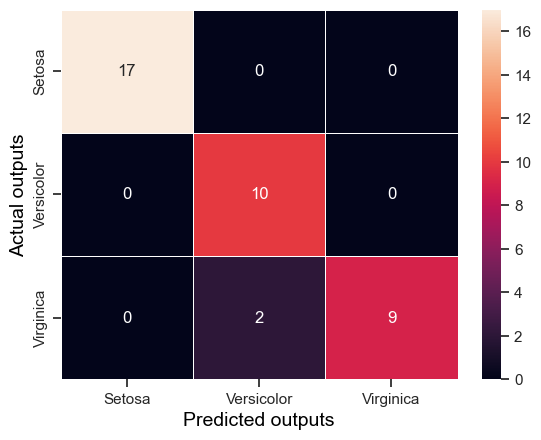

In [39]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, SVM_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

### 5. Decision Tree Model

In [40]:
DTree_model = DecisionTreeClassifier(max_depth = 3)
DTree_model.fit(X_train , y_train)
DTree_pred = DTree_model.predict(X_test)
print("Decision Tree: ")
Evaluate_Performance(DTree_model, X_train, X_test, y_train, y_test)

Decision Tree: 

 • Training Accuracy Score :  98.21
 • Cross Validation Score : 96.36
 • Testing Accuracy Score :92.11
 • Precision Score is : 93.93
 • Recall Score is : 92.11
 • F1-Score Score is : 92.0


Text(47.25, 0.5, 'Actual outputs')

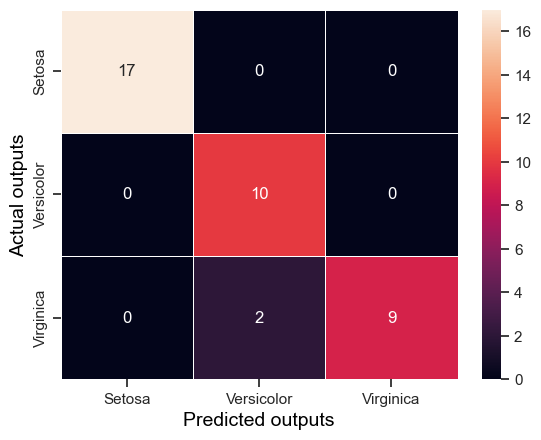

In [41]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, DTree_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

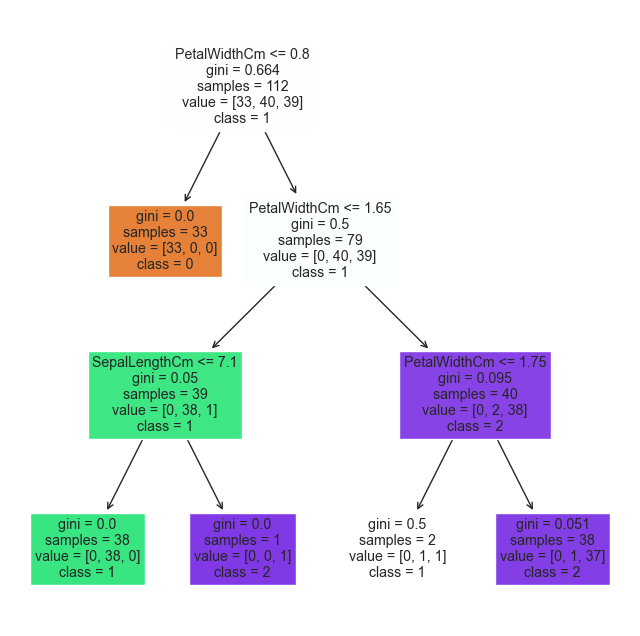

In [42]:
#white box one
F = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (8 , 8))
plot = tree.plot_tree (DTree_model , feature_names = F , class_names = T , filled = True)

### 6. Random Forest Model

In [43]:
RF_model = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF_model.fit(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print("Random Forest: ")
Evaluate_Performance(RF_model, X_train, X_test, y_train, y_test)

Random Forest: 

 • Training Accuracy Score :  98.21
 • Cross Validation Score : 96.36
 • Testing Accuracy Score :92.11
 • Precision Score is : 93.93
 • Recall Score is : 92.11
 • F1-Score Score is : 92.0


Text(47.25, 0.5, 'Actual outputs')

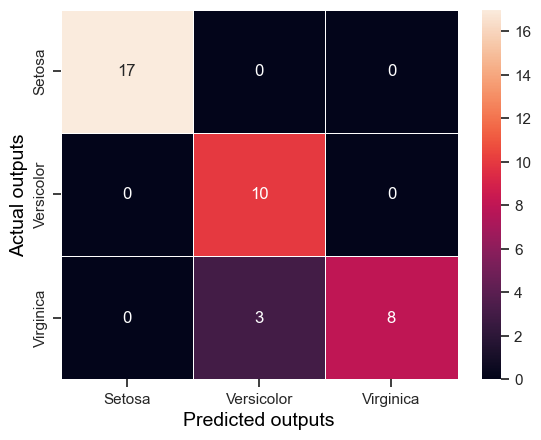

In [44]:
# Displaying the Confusion Matrix
conf_matrix = confusion_matrix(y_test, RF_pred)
labels = ['Setosa','Versicolor', 'Virginica']
conf_matrix = pd.DataFrame(conf_matrix, columns=np.unique(df['Species']), index = np.unique(df['Species']))
ax = sns.heatmap(conf_matrix, annot=True, linewidth=.5, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')

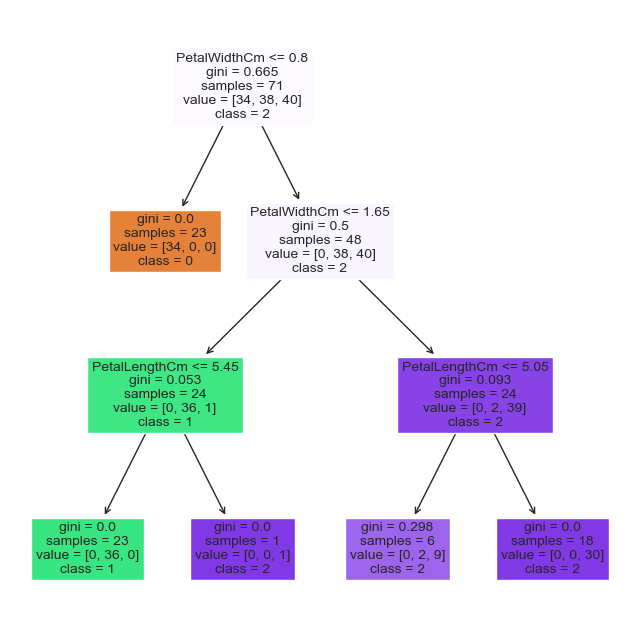

In [45]:
#white box one
F = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (8 , 8))
plot = tree.plot_tree (RF_model.estimators_[5] , feature_names = F , class_names = T , filled = True)

### Create Dataframe of all models performance metrics

In [46]:
models = pd.DataFrame ({
    'Model' : ['Logistic Regression', ' K-Nearest Neighbors Model', 'Gaussian Naive Bayes', 'Support Vector Machine', 
               'Decision Tree', 'Random Forest'] ,
    'Precision' : [precision_score(y_test, Logistic_pred, average='weighted') , precision_score(y_test, KNN_pred, average='weighted'),
                   precision_score(y_test, GNB_pred, average='weighted') , precision_score(y_test, SVM_pred, average='weighted'), 
                   precision_score(y_test, DTree_pred, average='weighted') , precision_score(y_test, RF_pred, average='weighted')],
    'Recall' : [recall_score(y_test, Logistic_pred, average='weighted') , recall_score(y_test, KNN_pred, average='weighted'), 
                recall_score(y_test, GNB_pred, average='weighted') , recall_score(y_test, SVM_pred, average='weighted'),
                recall_score(y_test, DTree_pred, average='weighted') , recall_score(y_test, RF_pred, average='weighted')],
    'F1-score' : [f1_score(y_test, Logistic_pred, average='weighted') , f1_score(y_test, KNN_pred, average='weighted'),
                  f1_score(y_test, GNB_pred, average='weighted') , f1_score(y_test, SVM_pred, average='weighted'), 
                  f1_score(y_test, DTree_pred, average='weighted') , f1_score(y_test, RF_pred, average='weighted')],
    'Accuracy' : [accuracy_score(y_test, Logistic_pred) , accuracy_score(y_test, KNN_pred) , accuracy_score(y_test, GNB_pred),
                  accuracy_score(y_test, SVM_pred) , accuracy_score(y_test, DTree_pred) , accuracy_score(y_test, RF_pred)]})

models = models.sort_values(by='Accuracy', ascending=False)    
print(tabulate(models, headers='keys', tablefmt='github',showindex=False))

| Model                     |   Precision |   Recall |   F1-score |   Accuracy |
|---------------------------|-------------|----------|------------|------------|
| K-Nearest Neighbors Model |    0.976077 | 0.973684 |   0.973684 |   0.973684 |
| Logistic Regression       |    0.95614  | 0.947368 |   0.947129 |   0.947368 |
| Support Vector Machine    |    0.95614  | 0.947368 |   0.947129 |   0.947368 |
| Decision Tree             |    0.95614  | 0.947368 |   0.947129 |   0.947368 |
| Gaussian Naive Bayes      |    0.939271 | 0.921053 |   0.919969 |   0.921053 |
| Random Forest             |    0.939271 | 0.921053 |   0.919969 |   0.921053 |


### Bar plot of all Models Accuracy Comparision

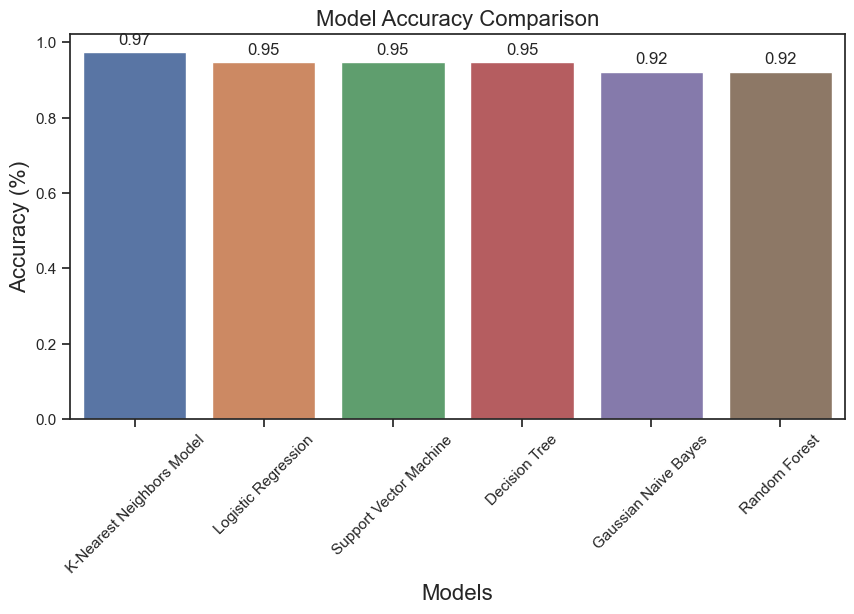

In [47]:
plt.figure(figsize=(10, 5))
plot=sns.barplot(x='Model',y='Accuracy',data=models)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Model Accuracy Comparison",fontsize=16)
plt.xlabel("Models",fontsize=16)
plt.ylabel("Accuracy (%)",fontsize=16)
plt.xticks(rotation=45)
plt.show()

## Model Testing: The Inference Pipeline

In [48]:
# Checking a sample of predictor value of measurements from the the model which is trained
X.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [49]:
# Checking the species according to above predictor variables
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int64

**Note:** Numerical values to the classes: "setosa":0,"versicolor":1,"virginica":2. We passed numerical values of these classes to our model, so our model will predict numerical values only.

In [50]:
# Generate unseen data accordingly with inputs
user_values=np.array([6.7,3.0,5.2,2.3]).reshape(1,-1)
feature_names = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm"]
user_values_df = pd.DataFrame(user_values, columns=feature_names)

# Predict the species using KNN model 
predict = KNN_model.predict(user_values_df)

# Display the predicted species
print(f'The species is: {predict}')

The species is: [2]


We took the sample data from X.tail() and asked given the input and then generated unseen data accordingly with inputs. The original species was Iris-virginica and our trained model with KNN predicted [2] which means Iris-virginica on unseen data. Therefore, showing the robustness of model.

## Generating the output file with predicted results

In [51]:
#decoding the species 
df["Species"]=df["Species"].replace({0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
#storing the predicted results in a dataframe
pred_result = pd.DataFrame(KNN_model.predict(X))
pred_result = pred_result.rename(columns = {0 : "Predicted Species"})
pred_result

,Predicted Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [53]:
#decoding the species for predicted results
Species_decoded = {0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'}
pred_result['predicted_species'] = pred_result['Predicted Species'].map(Species_decoded)
pred_result

,Predicted Species,predicted_species
0,0,Iris-setosa
1,0,Iris-setosa
2,0,Iris-setosa
3,0,Iris-setosa
4,0,Iris-setosa
...,...,...
145,2,Iris-virginica
146,2,Iris-virginica
147,2,Iris-virginica
148,2,Iris-virginica


In [54]:
#Generating the output file with predicted species
final_model = pd.concat([df, pred_result['predicted_species']], axis = 1)
final_model

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted_species
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


In [55]:
final_model.to_csv(r"C:\Users\BINDU MADHURI\Desktop\OIBSIP\IRIS FLOWER CLASSIFICATION\IRIS_Flower_Classified.csv")

## Conclusion:

- The dataset is balanced i.e. equal records are present for all three species.
- We have four numerical columns while just one categorical column which in turn is our target column.
- We have performed Explorative Data Analysis on the Iris dataset and created various colorful visualizations, including boxplots, pairplots, histogram,  histogram with a density plot, swarm Plots, violin plots, a correlation heatmap, and a pie chart for species distribution.
- These visualizations helped in understanding the relationships and differences between Iris species and features, making it easier to classify and analyze these flowers based on their measurements.
- The setosa species is the most easily distinguishable because of its small feature size. The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.
- EDA with visualizations of the Iris dataset reveals that features like petal length and petal width are highly discriminative for distinguishing between the three Iris species. This information is crucial to build a machine learning model for Iris species classification.
- By employing machine learning algorithms such as Logistic Regression, K-Nearest Neighbors (KNN) classification, Gaussian Naive Bayes classification, Support Vector Machine, Decision Tree, and Random Forest, we successfully constructed models capable of precisely classifying Iris flowers into their respective species based on these measurements.
- Furthermore, the evaluation of machine learning models revealed that K-Nearest Neighbors (KNN) outperformed other classification models, with an impressive accuracy of 97.3% on unseen data, highlighting the model's robustness.
- Our results highlight the effectiveness of machine learning techniques in automating species classification based on morphological attributes, contributing to the fields of botany, ecology, and beyond.